### Hypothesis
My hypothesis is that there will be a strong, positive, correlation with governement expenditure on education (% of GDP) vs their compulsory education length.

In [70]:
import pandas as pd
GDP = "SE.XPD.TOTL.GD.ZS"
years = "SE.COM.DURS"

This reads the file from the proper directory.

In [5]:
edu = pd.read_csv("../../data/databank_education_2018.csv")

The shape method is called to review the size of our data.

In [73]:
edu.shape

(244, 94)

The head method allows us to view the first x number of rows.

In [72]:
edu.head(10)

,Country,SE.COM.DURS,SE.ENR.PRIM.FM.ZS,SE.ENR.PRSC.FM.ZS,SE.ENR.SECO.FM.ZS,SE.ENR.TERT.FM.ZS,SE.PRE.DURS,SE.PRE.ENRL.TC.ZS,SE.PRE.ENRR,SE.PRE.ENRR.FE,...,SH.DYN.1014,SH.DYN.1519,SH.DYN.2024,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SP.POP.0014.TO.ZS,SP.POP.1564.TO.ZS
0,Afghanistan,9.0,0.66691,0.63602,0.57098,0.34523,1.0,NaN,NaN,NaN,...,2.000000,13.800000,17.600000,21.247021,10319282.0,13.920000,10.290000,11.060000,43.090176,54.324898
1,Albania,9.0,1.03765,1.01730,1.00539,1.36299,5.0,17.09409,80.498734,80.790977,...,1.100000,1.800000,1.900000,42.190687,1400072.0,11.870000,12.620000,12.300000,17.672874,68.582390
2,Algeria,10.0,0.95499,NaN,NaN,1.39722,1.0,NaN,NaN,NaN,...,1.700000,2.700000,3.300000,20.126974,12589369.0,20.490000,9.720000,11.890000,30.148679,63.488825
3,Andorra,10.0,NaN,NaN,NaN,NaN,3.0,13.27711,NaN,NaN,...,0.500000,1.400000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,6.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,6.400000,13.100000,19.900000,50.202910,12705650.0,7.280000,6.720000,7.000000,46.808925,50.974702
5,Antigua and Barbuda,11.0,0.99208,0.97924,0.96286,NaN,5.0,NaN,70.253601,74.025070,...,1.000000,2.500000,3.200000,NaN,NaN,NaN,NaN,NaN,22.081092,69.119083
6,Arab World,9.0,0.94617,0.94833,0.95186,1.09935,3.0,21.16757,27.001801,26.855440,...,2.923226,6.268086,8.017785,20.368759,134761988.0,19.903642,7.788688,10.256798,32.780436,62.661687
7,Argentina,14.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,...,1.100000,3.500000,4.900000,43.001857,20551682.0,10.540000,8.230000,9.220000,24.760934,64.121277
8,Armenia,12.0,0.99961,1.02283,1.03762,1.24788,3.0,6.27090,38.021290,39.659691,...,1.000000,2.300000,2.700000,44.231575,1245626.0,20.400000,17.830000,18.969999,20.633422,68.112760
9,Aruba,13.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.802447,68.646606


Here I pull the Country label, as well as the two columns of data that I am testing with my hypothesis. I then show the first 10 rows using the head method.

In [22]:
edu_columns = edu[["Country" , GDP, years]]
edu_columns.head(10)

,Country,SE.XPD.TOTL.GD.ZS,SE.COM.DURS
0,Afghanistan,NaN,9.0
1,Albania,NaN,9.0
2,Algeria,NaN,10.0
3,Andorra,3.24672,10.0
4,Angola,NaN,6.0
5,Antigua and Barbuda,NaN,11.0
6,Arab World,NaN,9.0
7,Argentina,NaN,14.0
8,Armenia,NaN,12.0
9,Aruba,NaN,13.0


Using the notna method, we are able to filter out any rows that are missing values. This greatly reduces the number of rows that we will be reviewing.

In [45]:
gdp_years = edu_columns[edu_columns[GDP].notna() & edu_columns[years].notna()]
gdp_years.shape

(68, 3)

The head method is called once again. This allows us to spot check to make sure that our remaining data is valid.

In [46]:
gdp_years.head(10)

,Country,SE.XPD.TOTL.GD.ZS,SE.COM.DURS
3,Andorra,3.24672,10.0
12,Azerbaijan,2.45543,10.0
19,Belize,7.56149,8.0
20,Benin,2.93397,6.0
27,British Virgin Islands,2.46599,12.0
30,Burkina Faso,5.38379,10.0
34,Cameroon,3.13120,6.0
36,Caribbean small states,5.41478,6.5
42,Colombia,4.45749,12.0
45,"Congo, Rep.",3.51105,10.0


The sort_values method allow us to sort a column. Here I sort from highest %GDP to lowest and then use the head method to show the first 10 rows.

In [48]:
gdp_years.sort_values(by=GDP, ascending=False).head(10)

,Country,SE.XPD.TOTL.GD.ZS,SE.COM.DURS
19,Belize,7.56149,8.0
193,Sierra Leone,6.98963,9.0
126,Lesotho,6.98519,7.0
46,Costa Rica,6.97857,13.0
220,Timor-Leste,6.79295,9.0
200,South Africa,6.15899,9.0
91,Honduras,6.06746,12.0
243,Zimbabwe,5.87135,7.0
208,St. Vincent and the Grenadines,5.69378,12.0
87,Guyana,5.49358,6.0


I import necessary libraries and then plot the GDP vs the years. I also add in axes labels and also compute and plot a linear regression line.

slope- 0.06398122329666948
y intercept- 0.06398122329666948


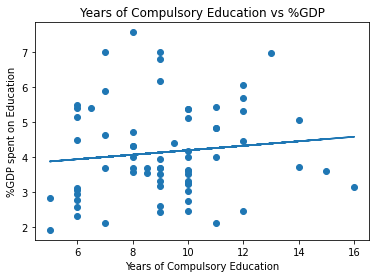

In [88]:
import matplotlib.pyplot as pyplot
import numpy as np

m, b = np.polyfit(gdp_years[years], gdp_years[GDP], 1)
print("slope- " f"{m}")
print("y intercept- " f"{m}")

pyplot.scatter(gdp_years[years], gdp_years[GDP])
pyplot.xlabel("Years of Compulsory Education")
pyplot.ylabel("%GDP spent on Education")
pyplot.title("Years of Compulsory Education vs %GDP")
pyplot.plot(gdp_years[years], m*gdp_years[years] + b)
pyplot.show()

I use the .corr method to check the correlation between the GDP and years. It's not looking very strong to me.

In [69]:
gdp_years[GDP].corr(gdp_years[years])

0.11437126126909493

### Conclusion
Overall, my hypothesis was incorrect. I originally thought that there would be a strong, positive correlation between the %GDP on education expenditures vs the # of years of compulsory education. However, there is only a very slight postive correlation of 0.114. 